In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

execfile ("_ImportScript.py")

1


In [2]:
execfile ("_ExploreMocksOneNoiseRezEach.py")

/Users/LaurencePeanuts/Documents/Travail/Stanford/Music/Music/beatbox/universe.py:553: RuntimeWarning: divide by zero encountered in power
  self.Power_Spectrum = self.PSnorm*10000*np.power((self.k/self.kstar) ,(-3+(self.n_s-1)))
/Users/LaurencePeanuts/Documents/Travail/Stanford/Music/Music/beatbox/universe.py:390: ComplexWarning: Casting complex values to real discards the imaginary part
  ay_real[zero_ind] = value[zero_ind].astype(np.float)
/Users/LaurencePeanuts/Documents/Travail/Stanford/Music/Music/beatbox/multiverse.py:355: ComplexWarning: Casting complex values to real discards the imaginary part
  R_real[zero_ind,:] = beatbox.Universe.R[zero_ind,:].astype(np.float)


NameError: name 'alphas' is not defined

In [3]:
alphas = np.loadtxt("RobustnessAnalysis/alpha_lmax8lmin2nmax2nmin1.txt")

In [ ]:
from matplotlib import rc
rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
## for Palatino and other serif fonts use:
#rc('font',**{'family':'serif','serif':['Palatino']})
rc('text', usetex=True)

In [ ]:
import matplotlib.pyplot as plt
from scipy.stats import norm
n, bins, patches = plt.hist(alphas, 40, normed=1, facecolor='green', alpha=0.75)

plt.rc('text', usetex=True)
plt.rc('font', family='serif')

plt.xlabel(r'$\alpha$')
plt.ylabel('Probability')
plt.title(r'Histogram of $\alpha$ values')

#x = np.linspace(norm.ppf(0.01, loc=1, scale=0.19), norm.ppf(0.99, loc=1,  scale=0.19), 100)
x=np.linspace(0,1.6, 100)
rv = norm()
plt.plot(x, norm.pdf(x, loc=1.02, scale=0.14), 'k-', lw=2, label='frozen pdf')


#plt.axis([40, 160, 0, 0.03])
plt.grid(True)

plt.savefig('RobustnessAnalysis/alphahist_lmax8_nmax2.png')

plt.show()

In [ ]:
#Find the best fit mu and sigma for the Gaussian
from scipy.stats import multivariate_normal
# Find the best fit mu and sigma
sigma, mu = np.mgrid[0.14:0.16:.01, 1.0:1.04:.01]
posterior = np.zeros(sigma.shape)
print sigma.shape
for i in range(sigma.shape[0]):
    for j in range(sigma.shape[1]):
        posterior[i, j] = multivariate_normal.pdf(alphas, mu[i, j]*np.ones(alphas.shape), sigma[i, j]*np.diag(np.ones(alphas.shape)))
        print i, j
max_ind = np.argmax(posterior)

In [ ]:
import matplotlib.pyplot as plt
imgplot = plt.imshow(posterior)
plt.colorbar()


In [ ]:
print np.argmax(posterior)
print sigma[0,2]
print mu[0,2]


In [ ]:
sum_alpha = 0
for i in range(len(alphas)):
    sum_alpha=sum_alpha+(alphas[i]-1)**2
    
sum_alpha= sum_alpha/len(alphas)

print 'For l_max = ' + str(beatbox.Multiverse.truncated_lmax) + ' and n_max = ' + str(beatbox.Multiverse.truncated_nmax) + ', the alpha recovery success is ' + str(sum_alpha) + '.' 

In [ ]:
from scipy.stats import chi2
print 1-chi2.cdf(1.14, 5) 

In [3]:
print len(beatbox.You.all_reconstructed_universes)
print len(beatbox.You.all_simulated_universes)

1000
1000


In [ ]:
beatbox.You.solve_for_3D_potential(MockUniverse[-1].ay2ayreal_for_inference(MockUniverse[-1].ay))
Delta_fn = beatbox.You.all_simulated_universes[-1].fn.reshape(64, 1)-beatbox.You.all_reconstructed_universes[-1].fn
chi2value = np.dot (Delta_fn.T , np.dot( beatbox.You.inv_A, Delta_fn  ))
p_value = 1-chi2.cdf(chi2value, len(beatbox.You.all_simulated_universes[0].fn)) 
print chi2.cdf(chi2value, len(beatbox.You.all_simulated_universes[0].fn))
print p_value, chi2value

In [ ]:
pvals=np.array([])
chi2vals=np.array([])
for a in range(10000):
    beatbox.You.solve_for_3D_potential(MockUniverse[a].ay2ayreal_for_inference(MockUniverse[a].ay))
    Delta_fn = beatbox.You.all_simulated_universes[a].fn.reshape(64, 1)-beatbox.You.all_reconstructed_universes[a].fn
    chi2value = np.dot (Delta_fn.T , np.dot( beatbox.You.inv_A, Delta_fn  ))
    p_value = 1-chi2.cdf(chi2value, len(beatbox.You.all_simulated_universes[a].fn)) 
    pvals = np.append(pvals, p_value)
    chi2vals = np.append(chi2vals, chi2value)

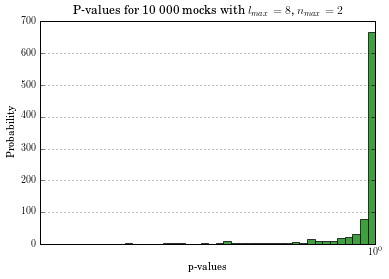

In [23]:
n, bins, patches = plt.hist(pvals,bins=np.logspace(-0.05, 0.0, 100), facecolor='green', alpha=0.75)
plt.gca().set_xscale("log")
#n, bins, patches = plt.hist(pvals,bins=np.linspace(0.9, 1.0, 100), facecolor='green', alpha=0.75)
plt.rc('text', usetex=True)
plt.rc('font', family='serif')

plt.xlabel(r'p-values')
plt.ylabel('Probability')
plt.title(r'P-values for 10 000 mocks with $l_{max}=8$, $n_{max}=2$')
plt.xlim(0.95,1)

#x = np.linspace(norm.ppf(0.01, loc=1, scale=0.19), norm.ppf(0.99, loc=1,  scale=0.19), 100)
#x=np.linspace(0,1.6, 100)
#rv = norm()
#plt.plot(x, norm.pdf(x, loc=1.02, scale=0.14), 'k-', lw=2, label='frozen pdf')


#plt.axis([40, 160, 0, 0.03])
plt.grid(True)

plt.savefig('RobustnessAnalysis/pvalshist_lmax8_nmax2.png')

plt.show()

In [13]:
from scipy.stats import chi2
chi2.cdf(548, 64) 

1.0

In [24]:
print pvals[0:300]

[ 0.9999892   0.99624327  0.99999994  0.99998386  0.99999986  0.9984533
  0.99990109  0.99999953  0.99999972  1.          0.98565957  0.9999774
  0.97826382  0.99999805  0.99870373  0.96151067  1.          0.99996431
  0.97579532  0.99985917  0.99998596  0.99999752  0.99998463  0.9994967
  0.99999944  1.          0.9992653   0.99999994  0.9997653   0.99954912
  0.99991477  0.99999989  0.99865858  0.96881719  0.99997846  1.
  0.99997238  0.99999383  0.992019    0.99999688  0.99972602  0.99992663
  0.99794541  0.99717422  1.          0.99996597  0.99995576  0.99952744
  1.          0.99999959  0.9993536   0.999943    0.99876028  0.99945849
  0.99999988  0.99954385  0.97962312  0.99996496  0.97333273  0.99985876
  0.99999998  0.98036026  0.98965071  0.74258412  0.99996907  0.99935584
  0.99999964  0.99994434  0.88747927  0.99984302  0.99999467  0.98761002
  0.99835467  0.99967357  0.99999693  0.98992664  0.99981734  1.
  0.99999969  0.99996833  0.99999986  0.99859868  0.99994748  0.999982

In [15]:
Delta_fn = beatbox.You.all_simulated_universes[0].fn.reshape(64,1)-beatbox.You.all_reconstructed_universes[0].fn
print Delta_fn.shape, beatbox.You.all_simulated_universes[0].fn.shape, beatbox.You.all_reconstructed_universes[0].fn.shape
chi2value = np.dot (Delta_fn.T , np.dot( beatbox.You.inv_A, Delta_fn  ))
print chi2value

(64, 1) (64,) (64, 1)
[[ 548.63407198]]


Sigma is 0.000000 arcmin (0.000000 rad) 
-> fwhm is 0.000000 arcmin
Sigma is 0.000000 arcmin (0.000000 rad) 
-> fwhm is 0.000000 arcmin


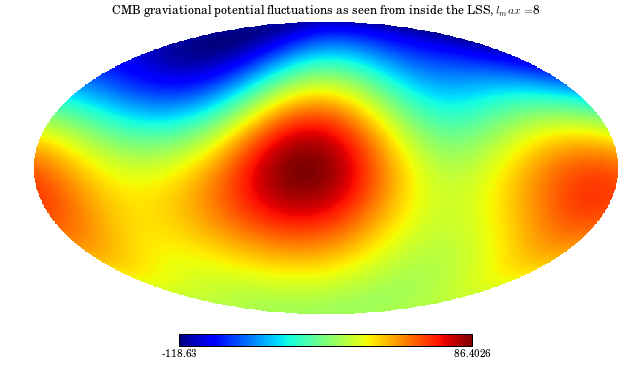

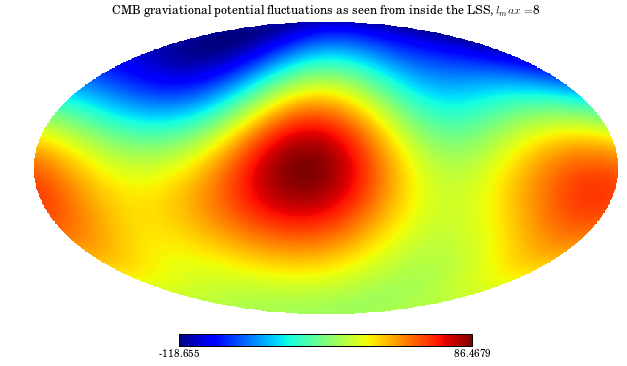

In [14]:
beatbox.You.all_simulated_universes[0].show_CMB_T_map()
beatbox.You.all_reconstructed_universes[0].show_CMB_T_map()

In [15]:
beatbox.You.all_reconstructed_universes[0].rearrange_fn_from_vector_to_grid()
beatbox.You.all_reconstructed_universes[0].evaluate_potential_given_fourier_coefficients()

Built potential grid, with dimensions  (41, 41, 41)  and mean value  0.0 +/- 0.7946298


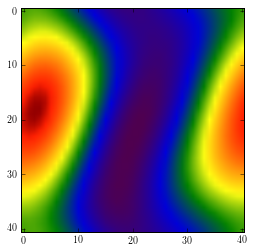

In [16]:
import matplotlib.pyplot as plt
imgplot = plt.imshow(beatbox.You.all_simulated_universes[0].phi[:,:,20])

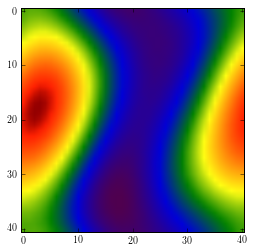

In [17]:
plt.imshow(beatbox.You.all_reconstructed_universes[0].phi[:,:,20])

In [ ]:
Universe.high_k_cutoff = Universe.truncated_nmax*Universe.Deltak
Universe.low_k_cutoff = Universe.truncated_nmin*Universe.Deltak
    
    # Define the filter
low_k_filter = (~(Universe.n < Universe.truncated_nmin)).astype(int)
high_k_filter = (~(Universe.n > Universe.truncated_nmax)).astype(int)
Universe.kfilter = high_k_filter*low_k_filter

In [ ]:
from scipy.special import sph_harm,sph_jn
truncated_nmax = Universe.truncated_nmax
truncated_nmin = Universe.truncated_nmin
truncated_lmax = Universe.truncated_lmax
truncated_lmin = Universe.truncated_lmin
lms = Universe.lms
kfilter = Universe.kfilter
    
    # Initialize R matrix:
NY = (truncated_lmax + 1)**2 - (truncated_lmin)**2
    # Find the indices of the non-zero elements of the filter
ind = np.where(Universe.kfilter>0)
# The n index spans 2x that length, 1st half for the cos coefficients, 2nd half
    #    for the sin coefficients
NN = 2*len(ind[1])
Universe.R = np.zeros([NY,NN], dtype=np.complex128)

k, theta, phi = Universe.k[ind], np.arctan2(Universe.ky[ind],Universe.kx[ind]), np.arccos(Universe.kz[ind]/Universe.k[ind])
    # We need to fix the 'nan' theta element that came from having ky=0
theta[np.isnan(theta)] = np.pi/2.0
    
    # Get ready to loop over y
y = 0
A = [sph_jn(truncated_lmax,ki)[0] for ki in k]        
    # Loop over y, computing elements of R_yn 
for i in lms:        
    l = i[0]
    m = i[1]
        
    trigpart = np.cos(np.pi*l/2.0)
    B = np.asarray([A[ki][l] for ki in range(len(k))])
    Universe.R[y,:NN/2] = 4.0 * np.pi * sph_harm(m,l,theta,phi).reshape(NN/2)*B.reshape(NN/2) * trigpart
    trigpart = np.sin(np.pi*l/2.0)
    Universe.R[y,NN/2:] = 4.0 * np.pi * sph_harm(m,l,theta,phi).reshape(NN/2)*B.reshape(NN/2)* trigpart
                
    y = y+1  